In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

iris = load_iris()

# Modelo supervisado

In [2]:
X = iris.data
y = iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [4]:
knn = KNeighborsClassifier(n_neighbors=10)

In [5]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [6]:
knn.score(X_test, y_test)

0.9666666666666667

In [7]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

Text(42.0, 0.5, 'Truth')

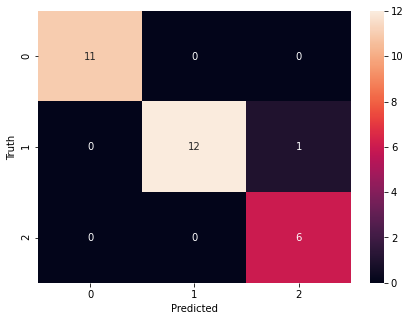

In [8]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [9]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [10]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(KNeighborsClassifier(), {
    'n_neighbors': list(range(1,51))
}, cv=10, return_train_score=False)
clf.fit(iris.data, iris.target)
clf.cv_results_

{'mean_fit_time': array([8.93497467e-04, 2.97999382e-04, 2.99453735e-04, 4.01830673e-04,
        3.98635864e-04, 4.98819351e-04, 9.93967056e-05, 3.98373604e-04,
        3.00240517e-04, 4.96864319e-04, 3.98993492e-04, 3.98993492e-04,
        3.98850441e-04, 3.98969650e-04, 3.99327278e-04, 3.98874283e-04,
        3.98635864e-04, 3.99112701e-04, 3.98945808e-04, 3.98945808e-04,
        4.98485565e-04, 4.99224663e-04, 2.98500061e-04, 4.98223305e-04,
        4.99010086e-04, 5.02395630e-04, 4.00090218e-04, 2.99406052e-04,
        4.98580933e-04, 4.98676300e-04, 3.98945808e-04, 4.98676300e-04,
        2.99215317e-04, 1.99437141e-04, 3.98969650e-04, 3.98874283e-04,
        3.98778915e-04, 3.98325920e-04, 4.99129295e-04, 4.99486923e-04,
        3.96943092e-04, 3.98874283e-04, 1.99079514e-04, 3.99494171e-04,
        2.99501419e-04, 2.99239159e-04, 1.99484825e-04, 4.98604774e-04,
        4.98700142e-04, 4.98747826e-04]),
 'std_fit_time': array([0.00029803, 0.0004552 , 0.00045742, 0.00049219, 0.000

In [99]:
clf.best_params_

{'n_neighbors': 13}

In [12]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000893,0.000298,0.001699,4.587853e-04,1,{'n_neighbors': 1},1.000000,0.933333,1.000000,0.933333,0.866667,1.000000,0.866667,1.000000,1.0,1.000000,0.960000,0.053333,24
1,0.000298,0.000455,0.001101,2.980540e-04,2,{'n_neighbors': 2},1.000000,0.933333,1.000000,0.933333,0.866667,1.000000,0.866667,0.933333,1.0,1.000000,0.953333,0.052068,27
2,0.000299,0.000457,0.000797,3.985867e-04,3,{'n_neighbors': 3},1.000000,0.933333,1.000000,0.933333,0.866667,1.000000,0.933333,1.000000,1.0,1.000000,0.966667,0.044721,18
3,0.000402,0.000492,0.000795,3.975775e-04,4,{'n_neighbors': 4},1.000000,0.933333,1.000000,0.933333,0.866667,1.000000,0.933333,1.000000,1.0,1.000000,0.966667,0.044721,18
4,0.000399,0.000488,0.000898,2.991882e-04,5,{'n_neighbors': 5},1.000000,0.933333,1.000000,1.000000,0.866667,0.933333,0.933333,1.000000,1.0,1.000000,0.966667,0.044721,12
5,0.000499,0.000499,0.000897,2.993337e-04,6,{'n_neighbors': 6},1.000000,0.933333,1.000000,1.000000,0.866667,0.933333,0.933333,1.000000,1.0,1.000000,0.966667,0.044721,12
6,0.000099,0.000298,0.000999,3.314018e-06,7,{'n_neighbors': 7},1.000000,0.933333,1.000000,1.000000,0.866667,0.933333,0.933333,1.000000,1.0,1.000000,0.966667,0.044721,12
7,0.000398,0.000488,0.000798,3.987944e-04,8,{'n_neighbors': 8},1.000000,0.933333,1.000000,1.000000,1.000000,0.866667,0.933333,0.933333,1.0,1.000000,0.966667,0.044721,12
8,0.000300,0.000459,0.000798,3.987768e-04,9,{'n_neighbors': 9},1.000000,0.933333,1.000000,1.000000,1.000000,0.933333,0.933333,0.933333,1.0,1.000000,0.973333,0.032660,4
9,0.000497,0.000497,0.000598,4.885387e-04,10,{'n_neighbors': 10},1.000000,0.933333,1.000000,1.000000,1.000000,0.866667,0.933333,0.933333,1.0,1.000000,0.966667,0.044721,12


# Modelo no supervisado

In [13]:
cluster = KMeans(n_clusters=3)

In [14]:
cluster.fit(X)

KMeans(n_clusters=3)

In [15]:
cluster.score(X)

-78.851441426146

In [16]:
cluster.inertia_

78.85144142614601

# Codo

C:\Users\manyv\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Elbow curve')

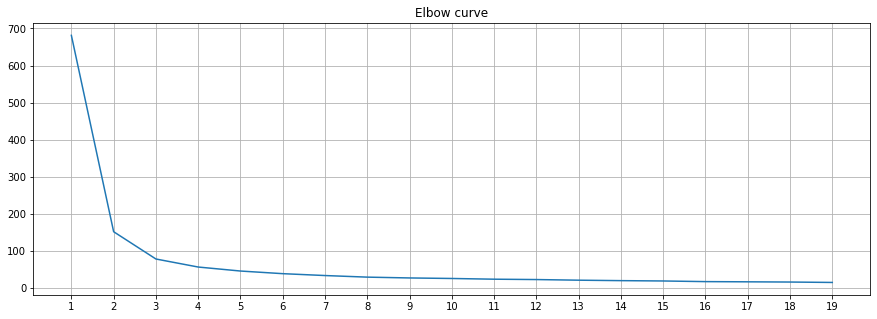

In [17]:
distorsions = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 20), distorsions)
plt.xticks(range(1,20))
plt.grid(True)
plt.title('Elbow curve')

In [18]:
score = silhouette_score(X, cluster.labels_, metric='euclidean')

In [19]:
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.553


In [20]:
# !pip install yellowbrick

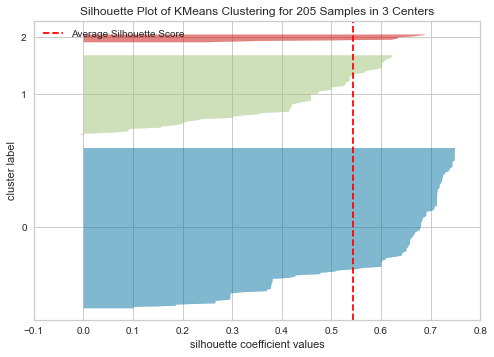

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 205 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [103]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()

# PCA + KNmeans

In [22]:
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns

In [23]:
scalar = StandardScaler()
scaled_data = scalar.fit_transform(X) #scaling the data

pca = PCA(0.80)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)

In [24]:
data_pca = pd.DataFrame(data_pca, columns=["X1","X2"])

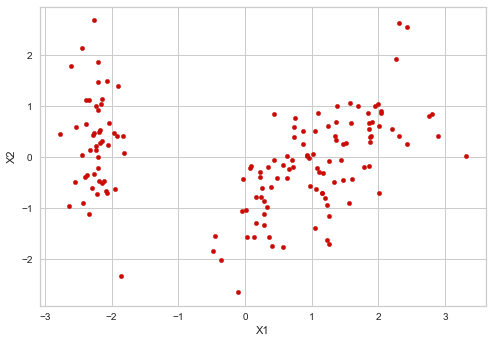

In [25]:
data_pca.plot(kind="scatter", x="X1", y="X2", c="r")
plt.show()

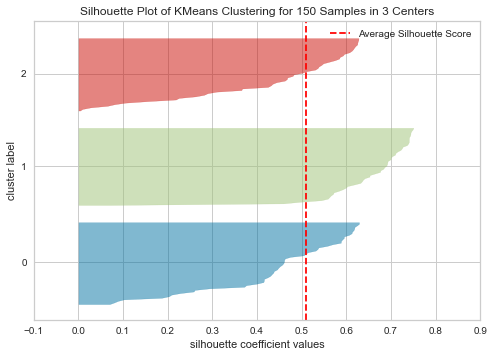

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 150 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [26]:
cluster = SilhouetteVisualizer(KMeans(n_clusters=3), colors='yellowbrick')
cluster.fit(data_pca)
cluster.show()

C:\Users\manyv\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Elbow curve')

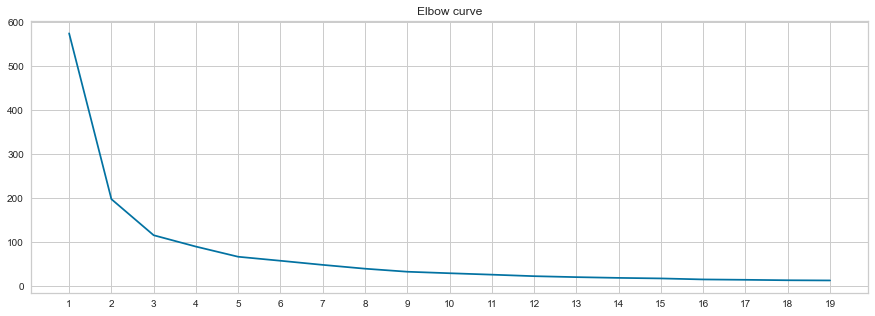

In [28]:
distorsions = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_pca)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 20), distorsions)
plt.xticks(range(1,20))
plt.grid(True)
plt.title('Elbow curve')

In [29]:
clusters = cluster.predict(data_pca)

In [30]:
data_pca["cluster"] = clusters

In [31]:
def colorear(x):
    if x==0: return "b"
    if x==1: return "r"
    if x==2: return "g"

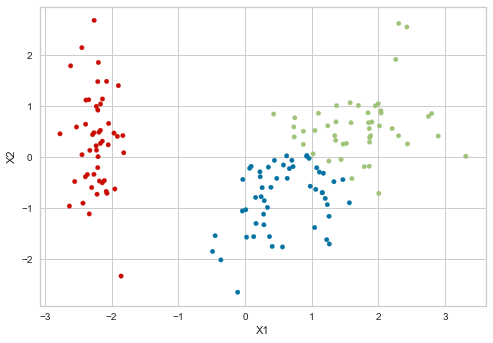

In [32]:
data_pca.plot(kind="scatter", x="X1", y="X2", c=data_pca["cluster"].apply(colorear))
plt.show()

# Actividad

In [104]:
datos = pd.read_csv("./03CarPrice_Assignment.csv")

In [105]:
len(datos)

205

In [106]:
X = datos[["wheelbase","carlength","carwidth","carheight","enginesize","boreratio","stroke","compressionratio"]]

In [107]:
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(X)) #scaling the data
scaled_data

,0,1,2,3,4,5,6,7
0,-1.690772,-0.426521,-0.844782,-2.020417,0.074449,0.519071,-1.839377,-0.288349
1,-1.690772,-0.426521,-0.844782,-2.020417,0.074449,0.519071,-1.839377,-0.288349
2,-0.708596,-0.231513,-0.190566,-0.543527,0.604046,-2.404880,0.685946,-0.288349
3,0.173698,0.207256,0.136542,0.235942,-0.431076,-0.517266,0.462183,-0.035973
4,0.107110,0.207256,0.230001,0.235942,0.218885,-0.517266,0.462183,-0.540725
...,...,...,...,...,...,...,...,...
200,1.721873,1.198549,1.398245,0.728239,0.339248,1.666445,-0.336970,-0.162161
201,1.721873,1.198549,1.351515,0.728239,0.339248,1.666445,-0.336970,-0.364062
202,1.721873,1.198549,1.398245,0.728239,1.109571,0.926204,-1.232021,-0.338824
203,1.721873,1.198549,1.398245,0.728239,0.435538,-1.183483,0.462183,3.244916


In [108]:
pca = PCA(n_components = 0.80)
# pca = PCA(n_components = 2)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca)
data_pca.head()

,0,1,2,3
0,-1.867598,1.967446,0.639208,1.808482
1,-1.867598,1.967446,0.639208,1.808482
2,-1.222887,-0.184959,-1.297259,-0.871322
3,-0.008458,-0.524531,-0.232600,-0.578180
4,0.194717,0.047084,-0.288983,-0.846260


In [109]:
sum(pca.explained_variance_ratio_)

0.8844960031570392

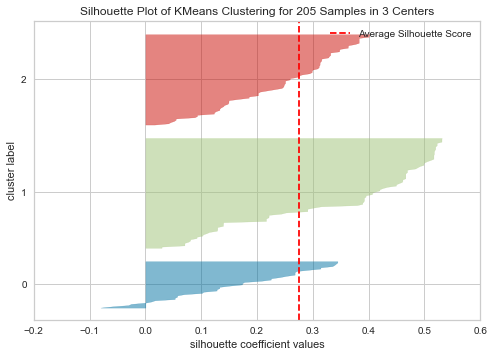

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 205 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [110]:
cluster = SilhouetteVisualizer(KMeans(n_clusters=3), colors='yellowbrick')
cluster.fit(data_pca)
cluster.show()

C:\Users\manyv\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Elbow curve')

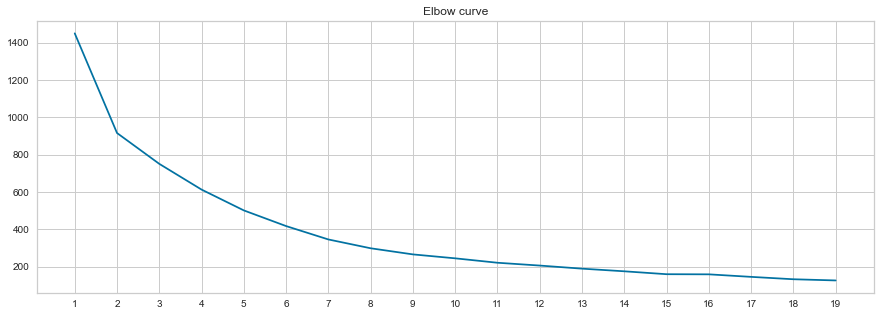

In [111]:
distorsions = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_pca)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 20), distorsions)
plt.xticks(range(1,20))
plt.grid(True)
plt.title('Elbow curve')

In [112]:
clusters = cluster.predict(data_pca)

In [113]:
data_pca["cluster"] = clusters

In [114]:
def colorear(x):
    if x==0: return "b"
    if x==1: return "r"
    if x==2: return "g"
    if x==3: return "y"

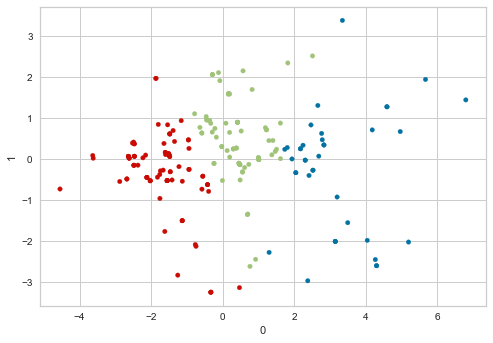

In [115]:
data_pca.plot(kind="scatter", x=0, y=1, c=data_pca["cluster"].apply(colorear))
plt.show()